In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Read CSV file
csv_file=pd.read_csv("50_straight_2.csv")

In [31]:
# Get SONAR Data

df1=csv_file.loc[csv_file['sensor']=="tof_sonar"]

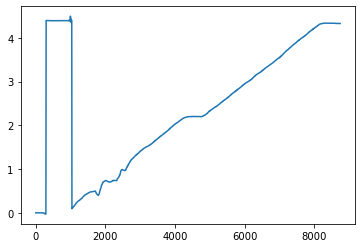

In [32]:
#Plot relative distance, i.e. All distance values-initial
df2=df1["sonar_distance"].iloc[0]-df1["sonar_distance"]
plt.plot(df2)

In [33]:
#Get velocity values from SONAR
vels=[]
for i in range(len(df1)-1):
    vels.append((df2.iloc[i+1]-df2.iloc[i])/(df1["time"].iloc[i+1]-df1["time"].iloc[i]))

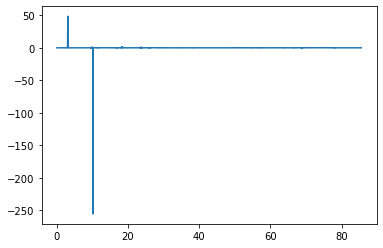

In [34]:
#Plot values
plt.plot(df1["time"].iloc[1:]-df1["time"].iloc[0],vels)

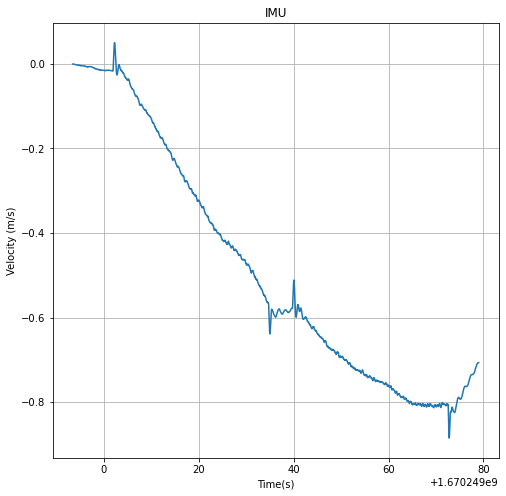

In [35]:
# To get velocity values from IMU using trapizoidal rule of integration

# For x-axis/surge

previous_acceleration = None
previous_time = None
vel_list = []
time_list = []
vel = 0
imu_dropped_readings = 0
baseline_calib = 0
for i in list(csv_file.index.values):
    if np.isnan(csv_file["accel x"][i]) == False:
        if previous_acceleration == None:
            previous_acceleration = csv_file["accel x"][i]
            previous_time = csv_file["time"][i]
        else:
            delta_vel = 0.5 *(csv_file["accel x"][i] + previous_acceleration) * (csv_file["time"][i] - previous_time)
            vel += delta_vel
            vel_list.append(vel)
            previous_acceleration = csv_file["accel x"][i]
            previous_time = csv_file["time"][i]
            time_list.append(csv_file["time"][i])
            
x = time_list
y = vel_list
plt.plot(x,y)
plt.title("IMU")
plt.xlabel("Time(s)")
plt.ylabel("Velocity (m/s)")
plt.grid()
plt.gcf().set_size_inches(8, 8)
plt.show()

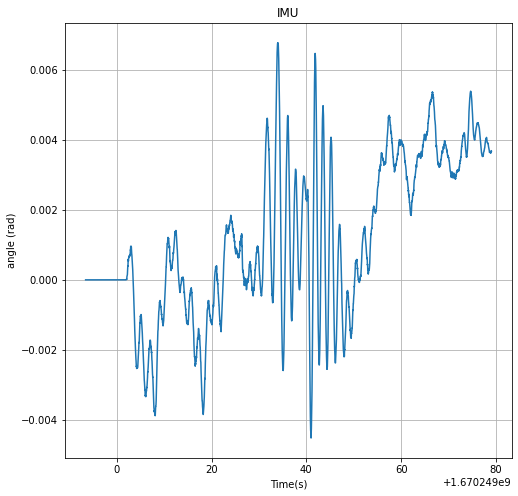

In [36]:
# To get angle values from IMU using trapizoidal rule of integration

# For x-axis/roll

previous_ang = None
previous_time = None
ang_list_x = []
time_list = []
ang = 0
imu_dropped_readings = 0
baseline_calib = 0
for i in list(csv_file.index.values):
    if np.isnan(csv_file["angular_vel x"][i]) == False:
        if previous_ang == None:
            previous_ang = csv_file["angular_vel x"][i]
            previous_time = csv_file["time"][i]
        else:
            delta_ang = 0.5 *(csv_file["angular_vel x"][i] + previous_ang) * (csv_file["time"][i] - previous_time)
            ang += delta_ang
            ang_list_x.append(ang)
            previous_ang = csv_file["angular_vel x"][i]
            previous_time = csv_file["time"][i]
            time_list.append(csv_file["time"][i])
            
x = time_list
y = ang_list_x
plt.plot(x,y)
plt.title("IMU")
plt.xlabel("Time(s)")
plt.ylabel("angle (rad)")
plt.grid()
plt.gcf().set_size_inches(8, 8)
plt.show()

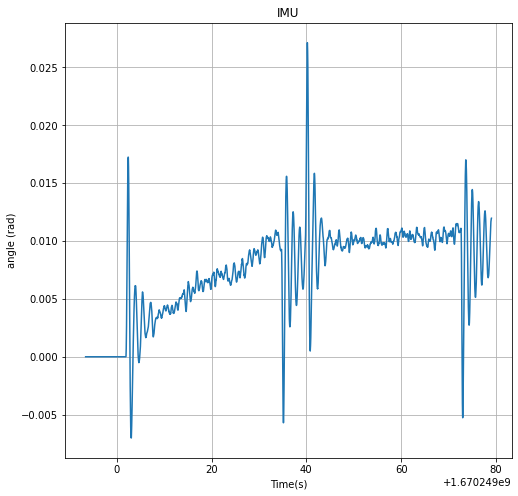

In [37]:
# To get angle values from IMU using trapizoidal rule of integration

# For y-axis/sway

previous_ang = None
previous_time = None
ang_list_y = []
time_list = []
ang = 0
imu_dropped_readings = 0
baseline_calib = 0
for i in list(csv_file.index.values):
    if np.isnan(csv_file["angular_vel y"][i]) == False:
        if previous_ang == None:
            previous_ang = csv_file["angular_vel y"][i]
            previous_time = csv_file["time"][i]
        else:
            delta_ang = 0.5 *(csv_file["angular_vel y"][i] + previous_ang) * (csv_file["time"][i] - previous_time)
            ang += delta_ang
            ang_list_y.append(ang)
            previous_ang = csv_file["angular_vel y"][i]
            previous_time = csv_file["time"][i]
            time_list.append(csv_file["time"][i])
            
x = time_list
y = ang_list_y
plt.plot(x,y)
plt.title("IMU")
plt.xlabel("Time(s)")
plt.ylabel("angle (rad)")
plt.grid()
plt.gcf().set_size_inches(8, 8)
plt.show()

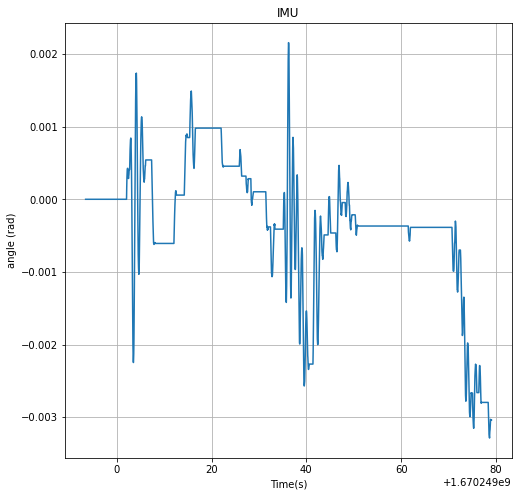

In [38]:
# To get angle values from IMU using trapizoidal rule of integration

# For z-axis/pitch

previous_ang = None
previous_time = None
ang_list_z = []
time_list = []
ang = 0
imu_dropped_readings = 0
baseline_calib = 0
for i in list(csv_file.index.values):
    if np.isnan(csv_file["angular_vel y"][i]) == False:
        if previous_ang == None:
            previous_ang = csv_file["angular_vel z"][i]
            previous_time = csv_file["time"][i]
        else:
            delta_ang = 0.5 *(csv_file["angular_vel z"][i] + previous_ang) * (csv_file["time"][i] - previous_time)
            ang += delta_ang
            ang_list_z.append(ang)
            previous_ang = csv_file["angular_vel z"][i]
            previous_time = csv_file["time"][i]
            time_list.append(csv_file["time"][i])
            
x = time_list
y = ang_list_z
plt.plot(x,y)
plt.title("IMU")
plt.xlabel("Time(s)")
plt.ylabel("angle (rad)")
plt.grid()
plt.gcf().set_size_inches(8, 8)
plt.show()

In [39]:
#To get all IMU related values

df_angs=csv_file.loc[csv_file['sensor']=="imu"]

In [40]:
#To get all angular acceleration values from IMU

ang_acc_x=[]
ang_acc_y=[]
ang_acc_z=[]
for i in range(len(df_angs)-1):
    time_val=(df_angs["time"].iloc[i+1]-df_angs["time"].iloc[i])
    ang_acc_x.append((df_angs.iloc[i+1]["angular_vel x"]-df_angs.iloc[i]["angular_vel x"])/time_val)
    ang_acc_y.append((df_angs.iloc[i+1]["angular_vel y"]-df_angs.iloc[i]["angular_vel y"])/time_val)
    ang_acc_z.append((df_angs.iloc[i+1]["angular_vel z"]-df_angs.iloc[i]["angular_vel z"])/time_val)

In [41]:
#For syncronising SONAR and IMU readings

#As the IMU samples faster than a SONAR, the nearest IMU reading is taken against that of a SONAR

time_accepted=[]
for x in df1["time"].iloc[:]:
    l1=np.array(time_list)-x
    idx=np.argmin(np.abs(np.array(l1)))
    time_accepted.append(idx)

In [42]:
#Discarded approach (Subtracting arrays their first element)

q_dot=np.array(ang_acc_y-ang_acc_y[0])
r_dot=np.array(ang_acc_z-ang_acc_z[0])
u_imu=np.array(vel_list)
q=np.array(df_angs.iloc[1:]["angular_vel y"]-df_angs.iloc[0]["angular_vel y"])
r=np.array(df_angs.iloc[1:]["angular_vel z"]-df_angs.iloc[0]["angular_vel z"])
theta=np.array(ang_list_x)
N_prop=np.ones_like(theta)*18.75
z_dot=np.array(df_angs.iloc[1:]["accel z"]-df_angs.iloc[0]["accel z"])

In [43]:
#Better approach, ignoring the first element

#try to see if making first element as zero instead helps


q_dot=np.array(ang_acc_y[1:])
r_dot=np.array(ang_acc_z[1:])
u_imu=np.array(vel_list)
p=np.array(df_angs.iloc[1:]["angular_vel x"])
q=np.array(df_angs.iloc[1:]["angular_vel y"])
r=np.array(df_angs.iloc[1:]["angular_vel z"])
theta=np.array(ang_list_x)
N_prop=np.ones_like(theta)*18.75
z_dot=np.array(df_angs.iloc[1:]["accel z"])

In [44]:
#For time syncronisation purposes


q_dot=np.take(q_dot,time_accepted)
r_dot=np.take(r_dot,time_accepted)
u_imu=np.take(u_imu,time_accepted)
p=np.take(p,time_accepted)
q=np.take(q,time_accepted)
r=np.take(r,time_accepted)
theta=np.take(theta,time_accepted)
N_prop=np.take(N_prop,time_accepted)
z_dot=np.take(z_dot,time_accepted)

In [45]:
#Reshaping numpy arrays

q_dot=np.reshape(q_dot,(len(time_accepted),1))
r_dot=np.reshape(r_dot,(len(time_accepted),1))
u_imu=np.reshape(u_imu,(len(time_accepted),1))
p=np.reshape(p,(len(time_accepted),1))
q=np.reshape(q,(len(time_accepted),1))
r=np.reshape(r,(len(time_accepted),1))
theta=np.reshape(theta,(len(time_accepted),1))
N_prop=np.reshape(N_prop,(len(time_accepted),1))
z_dot=np.reshape(z_dot,(len(time_accepted),1))

In [46]:
#Creation of H matrix

H=np.column_stack((q_dot,r_dot,u_imu,z_dot*q,np.power(q,2),np.power(r,2),p*r,np.sin(theta),N_prop))

In [47]:
#Renaming SONAR velocity values
#To make dimensions equal
vels.insert(0,0)
u_act=np.array(vels)




In [48]:
u_act=np.reshape(u_act,(len(vels),1))

In [49]:
#Least squares method Left hand side

A_T_A=np.dot(H.T,H)

In [50]:
#Least squares method right hand side

A_T_B=np.dot(H.T,u_act)

In [51]:
#Finding coefficients

alpha=np.dot(np.linalg.inv(A_T_A),A_T_B)

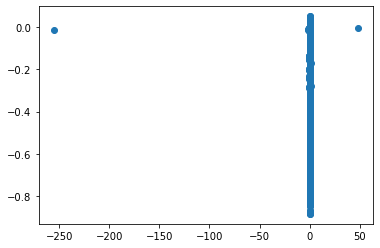

In [52]:
plt.scatter(u_act,u_imu)

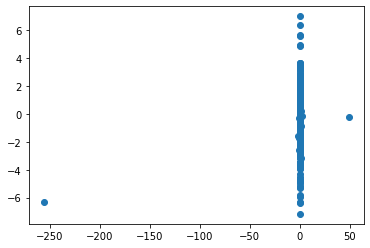

In [53]:
#Scatter plot to visualise performance
plt.scatter(u_act,np.dot(H,alpha))

In [54]:
#RMSE error before

MSE = np.square(np.subtract(u_imu,u_act)).mean() 
 
RMSE = np.sqrt(MSE)

RMSE

6.279825729479481

In [55]:
#RMSE error after

MSE = np.square(np.subtract(np.dot(H,alpha),u_act)).mean() 
 
RMSE = np.sqrt(MSE)

RMSE

6.176909776665157

In [56]:
alpha

array([[ 1.61067973e-01],
       [-3.12282153e+00],
       [-5.91098905e-01],
       [-2.11657357e+00],
       [-6.73330608e+01],
       [-2.81501580e+04],
       [ 3.54319182e+04],
       [-1.57379846e+01],
       [-1.33382858e-02]])